# Analise da serie temporal 01
## Cotacao do Dolar em relacao ao Real

In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

# imports de modulos que estao definidos dentro do projeto
import arima
import timeseries

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_original = pd.read_csv('../output/timeseries01.csv', header=0, names=['date', 'rate'])

#arima.print_dataframe_info(df_original)

## Obtendo a serie temporal DIARIA

In [3]:
df_daily = df_original.copy()
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily = df_daily.set_index('date')

#arima.print_dataframe_info(df_daily)

In [4]:
# esse comando preenche as datas que estao faltando
df_daily = df_daily.resample('D').ffill()

#arima.print_dataframe_info(df_daily)

In [5]:
df_daily = df_daily.replace(0, np.nan)
df_daily = df_daily.replace('.', np.nan)

timeseries.df_has_any_null(df_daily)

[FALHA] Existe valores nao definidos no dataframe


In [6]:
df_daily = df_daily.fillna(method='ffill')

timeseries.df_has_any_null(df_daily)

[SUCESSO] Todos os valores estao definidos no dataframe


In [7]:
df_daily['rate'] = pd.to_numeric(df_daily['rate'])

#arima.print_dataframe_info(df_daily)

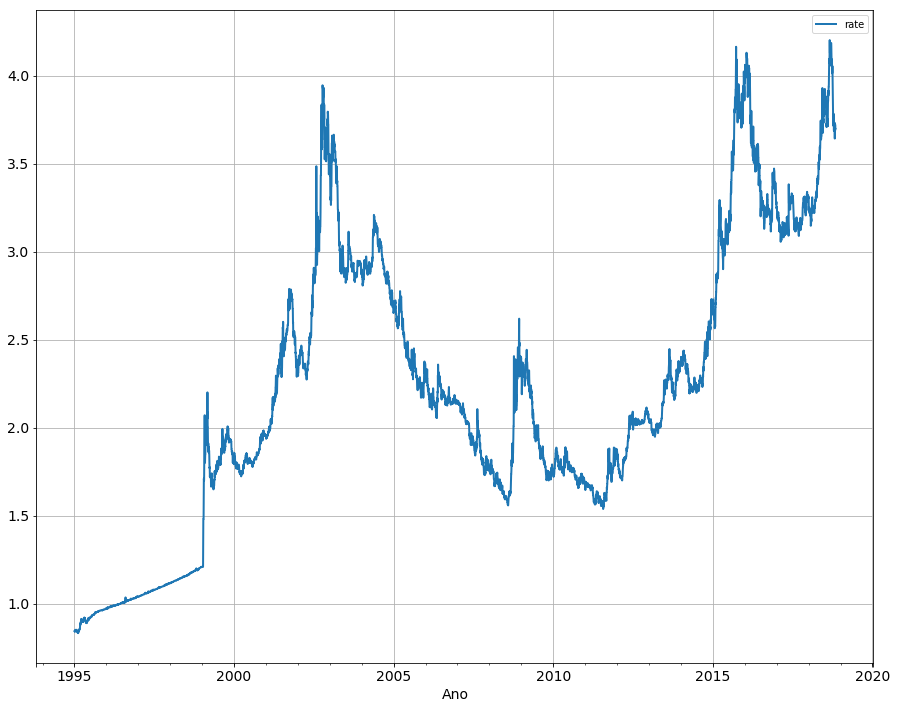

In [8]:
timeseries.plot_timeserie(df_daily)

In [9]:
# removo o periodo inicial da serie temporal
# tem um padrao que nao se repete
# estou trabalhando com dados de 18 anos
df_daily = df_daily['2000-11-03':]

#arima.print_dataframe_info(df_daily)

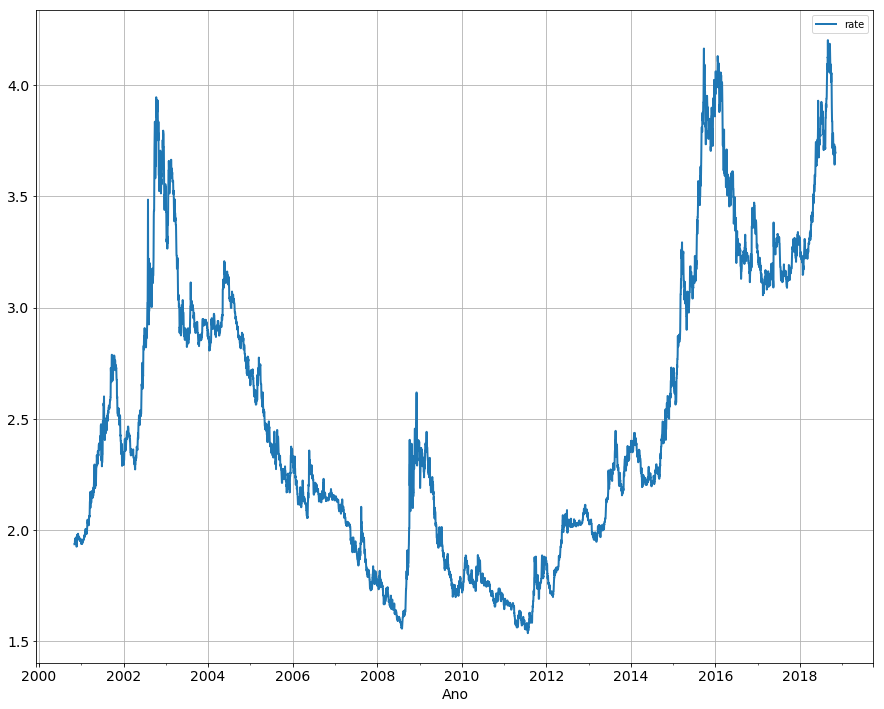

In [10]:
timeseries.plot_timeserie(df_daily)

## Obtendo a serie temporal do dia 15 e do fim de cada mes

In [11]:
# transforma numa serie temporal com o dia 15 e o fim de cada mes
# todo mes vou ter duas amostras
df_monthly2 = df_daily.resample('SM')
df_monthly2 = df_monthly2.mean()

#arima.print_dataframe_info(df_monthly2)

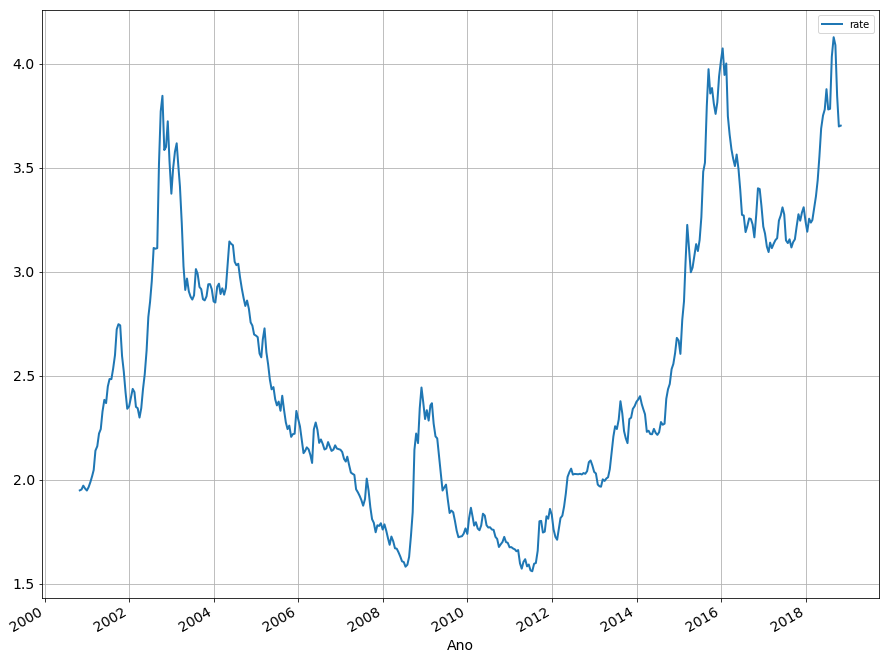

In [12]:
timeseries.plot_timeserie(df_monthly2)

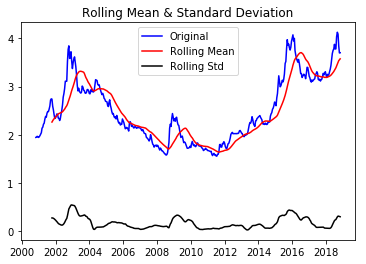

Results of Dickey-Fuller Test:
[FALHA] Test Statistic (-1.052807) > Critical Value 1 (-3.446129)
[FALHA] Test Statistic (-1.052807) > Critical Value 5 (-2.868496)
[FALHA] Test Statistic (-1.052807) > Critical Value 10 (-2.570475)
[FALHA] p-value (0.733520) > 0.05


In [13]:
timeseries.check_stationarity(df_monthly2, window=24)

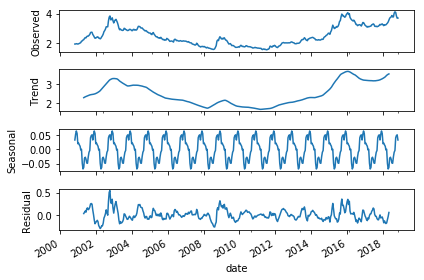

In [14]:
result = seasonal_decompose(df_monthly2, model='additive', freq=24)
result.plot()
plt.show()

## Obtendo a serie temporal MENSAL

In [15]:
df_monthly = df_daily.resample('M')
df_monthly = df_monthly.mean()

#arima.print_dataframe_info(df_monthly)

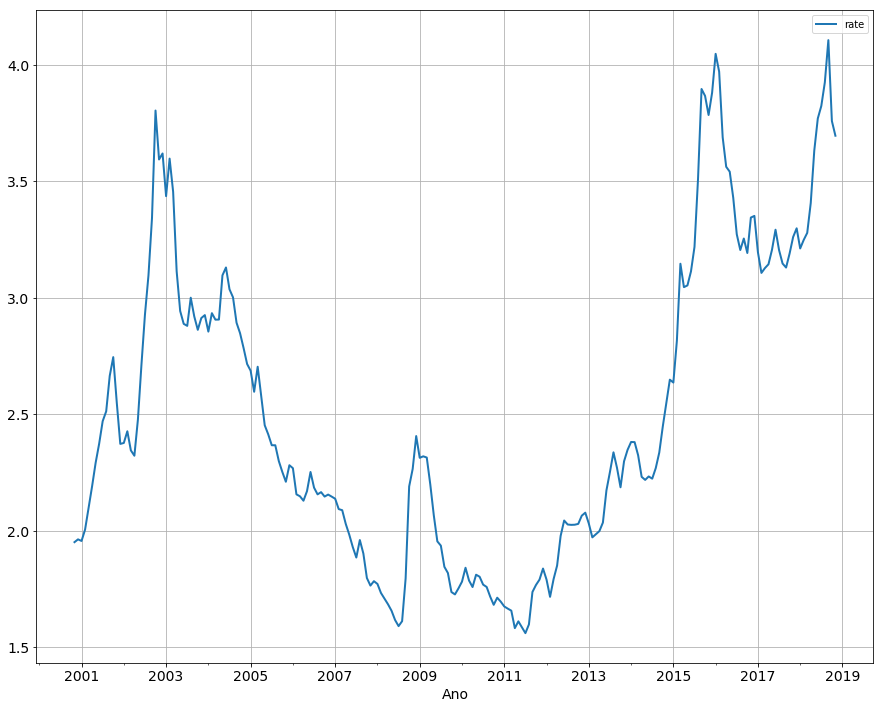

In [16]:
timeseries.plot_timeserie(df_monthly)

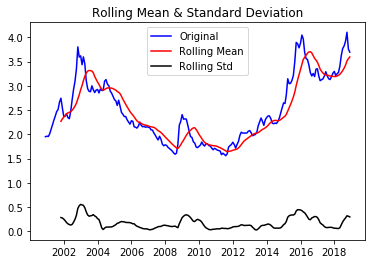

Results of Dickey-Fuller Test:
[FALHA] Test Statistic (-1.376881) > Critical Value 1 (-3.461136)
[FALHA] Test Statistic (-1.376881) > Critical Value 5 (-2.875079)
[FALHA] Test Statistic (-1.376881) > Critical Value 10 (-2.573986)
[FALHA] p-value (0.593308) > 0.05


In [17]:
timeseries.check_stationarity(df_monthly, window=12)

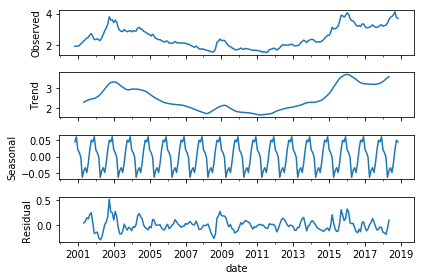

In [18]:
result = seasonal_decompose(df_monthly, model='additive', freq=12)
result.plot()
plt.show()